<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/FinalSubmissionNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [1482]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import seaborn as sns # for the correlation matrix plot
import pydot
import pydotplus
import io
import cv2
from google.colab import files

uploaded = files.upload()
wdbcwh = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh (27).csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We randomize the data to produce a more accurate model and to show us the variation in performance of our models as the data is different everytime. We could also use a random seed to produce the same "random" set of rows everytime, although we wanted to avoid this to reduce our models bias towards the data when training and testing our models.

In [1483]:
# split data into training and test datasets
features = list(wdbcwh.columns[2:32])

X = wdbcwh[features]
y = wdbcwh['Diagnosis']
# could use random state 42 for same results every time
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Here we are showing some of the values in our training sets and our test sets, by doing this we can see that we have a decent amount of randomness in our data

In [1484]:
print('X_train ',X_train)
print('y_train ',y_train)
print('X_test ',X_test)
print('y_test ',y_test)

X_train       Mean_Radius  Mean_Texture  ...  Worst_Symmetry  Worst_Fractal_Dimension
475       12.830         15.73  ...          0.3006                  0.07802
93        13.450         18.30  ...          0.2678                  0.06603
71         8.888         14.64  ...          0.2254                  0.10840
394       12.100         17.72  ...          0.3049                  0.07081
123       14.500         10.89  ...          0.2889                  0.08006
..           ...           ...  ...             ...                      ...
31        11.840         18.70  ...          0.4761                  0.14020
28        15.300         25.27  ...          0.4027                  0.09876
294       12.720         13.78  ...          0.2369                  0.06922
113       10.510         20.19  ...          0.2383                  0.09026
245       10.480         19.86  ...          0.2883                  0.07748

[398 rows x 30 columns]
y_train  475    B
93     B
71     B
394   

We show the shape of our test and training sets here, when using different split values we will get differing results.  It is important to know the shape of our sets as we can reshape them if needed to fit our models

In [1485]:
# print test sets shape will be same as training sets shape
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_test set shape:  (171, 30)
y_test set shape:  (171,)
X_train shape:  (398, 30)
y_train shape:  (398,)


Here we are replacing diagnosis values with a 1 for malignant and a 0 for benign, we do this because it makes it easier to perform numerical calculations on the sets. 

In [1486]:
# Disabled pandas warning due to false positive
pd.options.mode.chained_assignment = None  # default='warn'


# Replace malignant with 1 and benign with 0
y_train = y_train.replace({'M':1,'B':0})
y_test = y_test.replace({'M':1,'B':0})
y = y.replace({'M':1,'B':0})
# resetting pandas warning
pd.options.mode.chained_assignment = 'warn'  # default='warn'
X_trainNB, y_trainNB = X_train, y_train


## Show standard deviation and variance between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.  We can also see from these variables the amount of variation in certain features or throughout the overall dataset, these are useful metrics when training the models as we can ensure the models are trained with a large variety of different values.

Standard deviation is calculated by calculating the sum of each element in our data set then subtracting the population mean from the element and squaring we then divide by n and get the square root

Variance is calculated by essentially the same way but without getting the square root of our end result

In [1487]:
print('Standard deviation of values in x training set ',X_train.std())
print('Variance of diagnosis values in x training set: ', X_train.var())

Standard deviation of values in x training set  Mean_Radius                  3.481296
Mean_Texture                 4.222748
Mean_Perimeter              23.815839
Mean_Area                  340.095674
Mean_Smoothness              0.013770
Mean_Compactness             0.050612
Mean_Concavity               0.074402
Mean_Concave_Points          0.036789
Mean_Symmetry                0.026499
Mean_Fractal_Dimension       0.007415
Radius_SE                    0.241815
Texture_SE                   0.499631
Perimeter_SE                 1.735896
Area_SE                     35.367067
Smoothness_SE                0.002893
Compactness_SE               0.016731
Concavity_SE                 0.031862
Concave_Points_SE            0.006136
Symmetry_SE                  0.007288
Fractal_Dimension_SE         0.002664
Worst_Radius                 4.842164
Worst_Texture                6.086432
Worst_Perimeter             33.341683
Worst_Area                 565.517578
Worst_Smoothness             0.022049
Wo

In [1488]:

print('Standard deviation of values in y training set ',y_train.std())
print('Variance of values in y training set: ', y_train.var())

Standard deviation of values in y training set  0.4870706585410926
Variance of values in y training set:  0.2372378264116536


In [1489]:
print('Standard deviation of values in x testing set ',X_test.std())
print('Variance of values in x testing set: ', X_test.var())


Standard deviation of values in x testing set  Mean_Radius                  3.629898
Mean_Texture                 4.484972
Mean_Perimeter              25.451116
Mean_Area                  378.945944
Mean_Smoothness              0.014744
Mean_Compactness             0.057739
Mean_Concavity               0.091109
Mean_Concave_Points          0.043244
Mean_Symmetry                0.029512
Mean_Fractal_Dimension       0.006174
Radius_SE                    0.346711
Texture_SE                   0.656698
Perimeter_SE                 2.570971
Area_SE                     63.136715
Smoothness_SE                0.003245
Compactness_SE               0.020421
Concavity_SE                 0.025953
Concave_Points_SE            0.006264
Symmetry_SE                  0.010124
Fractal_Dimension_SE         0.002611
Worst_Radius                 4.823623
Worst_Texture                6.293949
Worst_Perimeter             34.291128
Worst_Area                 579.498822
Worst_Smoothness             0.024569
Wor

In [1490]:
print('Standard deviation of values in y testing set ',y_test.std())
print('Variance of values in y testing set: ', y_test.var())

Standard deviation of values in y testing set  0.4767739312220712
Variance of values in y testing set:  0.22731338149294825


Lets look at a histogram of diagnosis values in both our training and test sets to get a visualized view of our sets

(array([[28.,  2.,  0., ...,  0.,  0.,  0.],
        [28.,  1.,  1., ...,  0.,  0.,  0.],
        [30.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        [29.,  1.,  0., ...,  0.,  0.,  0.],
        [29.,  1.,  0., ...,  0.,  0.,  0.]]),
 array([   0. ,  343.2,  686.4, 1029.6, 1372.8, 1716. , 2059.2, 2402.4,
        2745.6, 3088.8, 3432. ]),
 <a list of 398 Lists of Patches objects>)

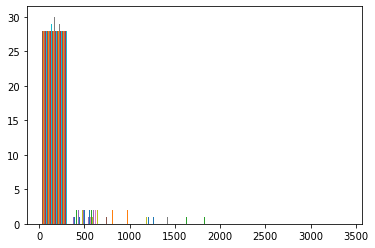

In [1491]:
plt.hist(X_train)


(array([[28.,  0.,  1., ...,  0.,  0.,  0.],
        [30.,  0.,  0., ...,  0.,  0.,  0.],
        [30.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [28.,  0.,  1., ...,  0.,  0.,  0.],
        [28.,  2.,  0., ...,  0.,  0.,  0.],
        [28.,  1.,  1., ...,  0.,  0.,  0.]]),
 array([   0. ,  425.4,  850.8, 1276.2, 1701.6, 2127. , 2552.4, 2977.8,
        3403.2, 3828.6, 4254. ]),
 <a list of 171 Lists of Patches objects>)

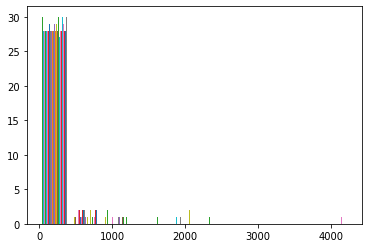

In [1492]:
plt.hist(X_test)


(array([245.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 153.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

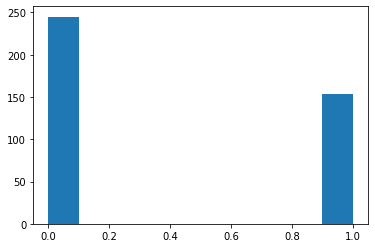

In [1493]:
plt.hist(y_train)


(array([112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  59.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

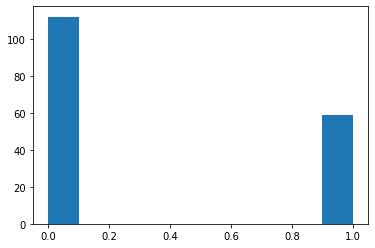

In [1494]:
plt.hist(y_test)


## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.  I have shown correlations of features for both the X and Y triaining and test sets.

### Training Set Correlation values

In [1495]:
# Show correlation of our training set
X_train.corr(method='pearson')

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.342784,0.998029,0.990185,0.102811,0.457384,0.617161,0.804515,0.096083,-0.351260,0.664788,-0.115480,0.658927,0.785774,-0.288878,0.159214,0.113084,0.354568,-0.175036,-0.092924,0.970345,0.324832,0.964967,0.940037,0.091686,0.391240,0.478547,0.736711,0.151488,-0.017289
Mean_Texture,0.342784,1.000000,0.350775,0.352883,-0.049680,0.250413,0.324380,0.312368,0.091119,-0.081113,0.338179,0.410560,0.352487,0.347251,0.019562,0.212215,0.136717,0.171747,0.044948,0.054149,0.374630,0.912376,0.384671,0.375565,0.077433,0.302354,0.318807,0.310821,0.137712,0.133442
Mean_Perimeter,0.998029,0.350775,1.000000,0.988509,0.136273,0.508723,0.656625,0.833393,0.129675,-0.303624,0.676031,-0.107550,0.676952,0.792317,-0.275531,0.204502,0.143392,0.384304,-0.155744,-0.055037,0.971154,0.333187,0.970609,0.940207,0.120301,0.435940,0.516874,0.765647,0.177322,0.029087
Mean_Area,0.990185,0.352883,0.988509,1.000000,0.099790,0.450671,0.623074,0.806317,0.096768,-0.327142,0.698584,-0.091465,0.689057,0.821103,-0.245199,0.164741,0.124254,0.352521,-0.156043,-0.070391,0.971221,0.330651,0.965227,0.960805,0.099242,0.374792,0.470091,0.723748,0.138784,-0.014537
Mean_Smoothness,0.102811,-0.049680,0.136273,0.099790,1.000000,0.621257,0.462496,0.505894,0.568329,0.570408,0.251055,0.062629,0.230254,0.191509,0.315067,0.283035,0.186777,0.351371,0.151525,0.291836,0.148347,-0.000243,0.166861,0.135721,0.796408,0.430580,0.378667,0.453335,0.366940,0.498688
Mean_Compactness,0.457384,0.250413,0.508723,0.450671,0.621257,1.000000,0.864799,0.813006,0.587692,0.576419,0.480127,0.027176,0.541446,0.466100,0.077014,0.741623,0.503673,0.614237,0.185882,0.529800,0.494415,0.261283,0.547876,0.466019,0.548217,0.873754,0.800407,0.806002,0.510341,0.727751
Mean_Concavity,0.617161,0.324380,0.656625,0.623074,0.462496,0.864799,1.000000,0.900771,0.466296,0.349558,0.583680,0.066258,0.612064,0.596462,0.027889,0.687677,0.677454,0.690478,0.134503,0.492497,0.635617,0.326433,0.674534,0.616527,0.419895,0.759300,0.892644,0.855938,0.407975,0.551995
Mean_Concave_Points,0.804515,0.312368,0.833393,0.806317,0.505894,0.813006,0.900771,1.000000,0.431457,0.151364,0.695170,-0.002931,0.707419,0.737823,-0.039266,0.471819,0.372932,0.600347,0.042623,0.250851,0.815428,0.315599,0.839102,0.790571,0.437221,0.669451,0.735465,0.914296,0.374413,0.386695
Mean_Symmetry,0.096083,0.091119,0.129675,0.096768,0.568329,0.587692,0.466296,0.431457,1.000000,0.502564,0.308992,0.117461,0.318942,0.224227,0.159431,0.398990,0.291854,0.355331,0.429499,0.360228,0.142589,0.098356,0.170618,0.128180,0.443890,0.452706,0.397617,0.402276,0.682648,0.467627
Mean_Fractal_Dimension,-0.351260,-0.081113,-0.303624,-0.327142,0.570408,0.576419,0.349558,0.151364,0.502564,1.000000,-0.016853,0.136238,0.021898,-0.128846,0.384186,0.573566,0.440490,0.331586,0.321876,0.722503,-0.287248,-0.070033,-0.243438,-0.267521,0.486748,0.449830,0.347428,0.160840,0.328546,0.782754


### Test set correlation values

In [1496]:
X_test.corr(method='pearson')

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.286064,0.997722,0.983170,0.314733,0.604780,0.792942,0.861399,0.252547,-0.210241,0.724747,-0.065776,0.724744,0.735436,-0.088994,0.295285,0.421286,0.422812,0.010380,0.072217,0.968388,0.238931,0.965590,0.943394,0.178633,0.461976,0.629344,0.760385,0.193055,0.071255
Mean_Texture,0.286064,1.000000,0.287677,0.260184,0.027621,0.209498,0.264090,0.259124,0.031737,-0.067123,0.186435,0.349223,0.184364,0.170072,-0.022268,0.154959,0.165669,0.149186,-0.053894,0.055306,0.306834,0.911348,0.303001,0.277462,0.074516,0.225781,0.264051,0.263770,0.033771,0.085589
Mean_Perimeter,0.997722,0.287677,1.000000,0.983148,0.354120,0.651361,0.827772,0.886632,0.288364,-0.156298,0.735652,-0.051667,0.741078,0.743482,-0.059729,0.336407,0.461183,0.455990,0.035819,0.104886,0.967440,0.241168,0.970385,0.944960,0.212170,0.497986,0.660736,0.782950,0.215712,0.108458
Mean_Area,0.983170,0.260184,0.983148,1.000000,0.329931,0.587537,0.796583,0.854603,0.254357,-0.180501,0.797738,-0.025194,0.798894,0.825634,-0.019163,0.296507,0.429408,0.413432,0.054688,0.088022,0.949036,0.202027,0.948717,0.958253,0.171047,0.422787,0.596895,0.719307,0.154969,0.048862
Mean_Smoothness,0.314733,0.027621,0.354120,0.329931,1.000000,0.731966,0.630427,0.644475,0.537370,0.635765,0.384375,0.074770,0.400663,0.329788,0.363593,0.383196,0.421501,0.446709,0.276982,0.266518,0.357846,0.109970,0.393514,0.360520,0.822491,0.559649,0.549722,0.606880,0.449005,0.513581
Mean_Compactness,0.604780,0.209498,0.651361,0.587537,0.731966,1.000000,0.915044,0.863165,0.630073,0.557897,0.529315,0.073870,0.569558,0.467545,0.239853,0.734621,0.762592,0.703079,0.295808,0.464574,0.624370,0.221771,0.677805,0.600330,0.596906,0.852408,0.847897,0.836307,0.510383,0.612921
Mean_Concavity,0.792942,0.264090,0.827772,0.796583,0.630427,0.915044,1.000000,0.955500,0.560739,0.324621,0.700284,0.089016,0.729092,0.662279,0.217359,0.642814,0.764821,0.678860,0.236803,0.372778,0.800181,0.252841,0.839927,0.795222,0.498944,0.753009,0.874190,0.877538,0.414505,0.456969
Mean_Concave_Points,0.861399,0.259124,0.886632,0.854603,0.644475,0.863165,0.955500,1.000000,0.518269,0.210933,0.710404,0.058041,0.726321,0.669774,0.145802,0.521126,0.621894,0.650093,0.171623,0.274089,0.868290,0.250457,0.893844,0.852331,0.481472,0.666621,0.786167,0.905794,0.380102,0.340750
Mean_Symmetry,0.252547,0.031737,0.288364,0.254357,0.537370,0.630073,0.560739,0.518269,1.000000,0.437242,0.300552,0.145115,0.313863,0.236742,0.238712,0.461442,0.485785,0.473291,0.487560,0.272823,0.278071,0.074453,0.319137,0.278669,0.394146,0.514701,0.504720,0.486453,0.735222,0.378432
Mean_Fractal_Dimension,-0.210241,-0.067123,-0.156298,-0.180501,0.635765,0.557897,0.324621,0.210933,0.437242,1.000000,0.032344,0.234290,0.077172,-0.046841,0.458789,0.556675,0.468383,0.374131,0.423150,0.596712,-0.161603,-0.002553,-0.103627,-0.137245,0.566009,0.491327,0.350627,0.217596,0.354516,0.716770


## Heatmap of correlation in our dataset
As you can see from the legend the lighter the square the more highly correlated the feature data and the darker the square the less correlated.

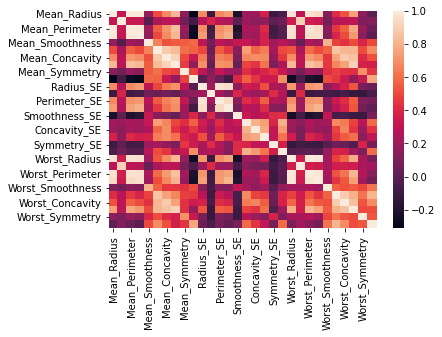

In [1497]:
# it computes the Pearson’s correlation coefficient.
corr_matrix = X.corr()
#The parameter ‘ annot=True ‘ displays the values of the correlation coefficient
#in each cell
sns.heatmap(corr_matrix, annot = False)
plt.show()


# Training the linear regression model

Here we are using linear regression to compare features in our model to see the correlation between them.  We are training this model to show us how dependent the variables are on one another.

### Reference
SKLearn documentation on Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Creating linear regression model for Mean_Radius and Mean_Fractal_Dimension
Here I have trained a model to show us the negative correlation between two features in our dataset, we can clearly see from this model that the Mean_Radius has a negative impact on the Mean_Fractal_Dimension.  When the Mean_Fractal_Dimension value increases then on average the Mean_Radius value decreases and vice versa.

y test r^2 value:  1.0
mean_squared_error value:  0.00014555891227921536
Coefficient:  [[-0.00074819]]
Intercept:  [0.07334571]
predict  [[-0.04142696]]


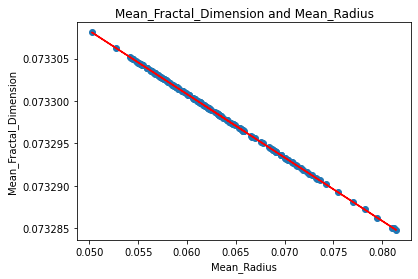

In [1498]:
# Here we train a model to perform linear regression data set to predict the diagnosis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy import stats
# create the linear regression model by fitting training set to the test set
fractalDimensionArrayTest = np.array(X_test['Mean_Fractal_Dimension']).reshape(-1,1)
fractalDimensionArrayTrain = np.array(X_train['Mean_Fractal_Dimension']).reshape(-1,1)
meanRadiusArrayTrain = np.array(X_train['Mean_Radius']).reshape(-1,1)
regression_model = LinearRegression().fit(meanRadiusArrayTrain, fractalDimensionArrayTrain)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(fractalDimensionArrayTest)
rSquared = regression_model.score(fractalDimensionArrayTest, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(fractalDimensionArrayTest, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

plt.xlabel("Mean_Radius")
plt.ylabel("Mean_Fractal_Dimension")
plt.title('Mean_Fractal_Dimension and Mean_Radius')
plt.scatter(fractalDimensionArrayTest,y_pred)
plt.plot(fractalDimensionArrayTest,y_pred,c='r')
print('predict ',regression_model.predict([[153.4]]))


I will demonstrate with some predictions below that the values are negatively skewed.  We will see that whenever we pass in a high fractal dimension the value will be lower and vice versa.  We can also see there is a low mean square error and a negative coefficient.  Since our coefficient is negative we will see that negative values will produce higher values for our dependent variable where as higher values will produce low values for our dependent variable

In [1499]:
# As we can see not too much of a difference between the values here
print('this value will be low: ', regression_model.predict([[0.5]]))
print('this value will be high: ', regression_model.predict([[0.1]]))

# just to make our example clearer let's use ridiculously inflated values  
print('let\'s make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another')
print('this value will be low: ', regression_model.predict([[100]]))
# I use a negative value here to demonstrate the radius the higher the mean fractal dimension
print('this value will be high: ', regression_model.predict([[-100]]))


this value will be low:  [[0.07297161]]
this value will be high:  [[0.07327089]]
let's make our model predict some grossly inflated / deflated values to show that these features do indeed have a negative impact on one another
this value will be low:  [[-0.0014735]]
this value will be high:  [[0.14816492]]


As we can see above that whenever I make the value of the mean fractal dimension higher then the value of our dependent variable will decrease, whenever I make it lower it will increase.  We can also see that the values don't have too much of an effect on each other this is because the low value of the negative correlation

# Positive correlation
Here we compare the concave points severity with the concavity severity, we see that there is a positive linear correlation between the two variables, we also see that the R^2 value is one which indicates a possible overfitting of our model.  We can see clearly from this graph that the two variables have a high correlation and that if the value increases in one of the variables then we can predict that the other variable also increases

y test r^2 value:  1.0
mean_squared_error value:  3.5719696254071577e-05
Coefficient:  [[0.14594559]]
Intercept:  [0.00720811]


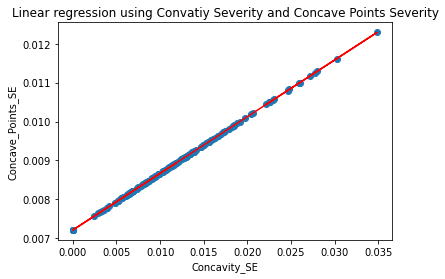

In [1500]:
# create the linear regression model by fitting training set to the test set
concavePointsSeverityArrayTest = np.array(X_test['Concave_Points_SE']).reshape(-1,1)
concavePointsSeverityArrayTrain = np.array(X_train['Concave_Points_SE']).reshape(-1,1)
concaveSeverityTrain = np.array(X_train['Concavity_SE']).reshape(-1,1)
# here we need to reshape the data using numpy so that the training data matches the testdata
regression_model = LinearRegression().fit(concaveSeverityTrain, concavePointsSeverityArrayTrain)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(concavePointsSeverityArrayTest)
rSquared = regression_model.score(concavePointsSeverityArrayTest, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(concavePointsSeverityArrayTest, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)
plt.xlabel("Concavity_SE")
plt.ylabel("Concave_Points_SE")
plt.title('Linear regression using Convatiy Severity and Concave Points Severity')
plt.scatter(concavePointsSeverityArrayTest,y_pred)
plt.plot(concavePointsSeverityArrayTest,y_pred,c='r')

We can see here there is a positive coefficient which is the amount we expect the value to increase by when making a prediction, we can also see that there is a low mean squared error value this indicates the performance of the model and the distance away the points are from our line

Below we see the second models features have on one another, we can clearly see that the data has a positive correlation from our graph but let's show some concrete examples and perform some predictions using it.

In [1501]:
print('this value will be high: ', regression_model.predict([[0.5]]))
print('this value will be low: ', regression_model.predict([[0.1]]))

# just to show how high the impact will be with grossly inflated / deflated values values

print('let\'s make our model predict some grossly inflated / deflated values to show severity of impact')
print('this value will be high: ', regression_model.predict([[100]]))
print('this value will be low: ', regression_model.predict([[0.0000000001]]))


this value will be high:  [[0.08018091]]
this value will be low:  [[0.02180267]]
let's make our model predict some grossly inflated / deflated values to show severity of impact
this value will be high:  [[14.6017676]]
this value will be low:  [[0.00720811]]


Since the above values are highly correlated we see a greater rise and decrease in the predicted values when predicting than we did in the first linear regression model.  This is due to the fact that these two variables have a positive correlation of 0.776207, the features we used in our first model have a lower negative correlation which is why we don't see as much of an impact on them.  If they had a negative correlation of 0.776207 we would see the same rise and decrease in the first linear regression models predicted valules as well

# Examples of low and high correlation in our dataset

Additionally we can see here the Mean Perimeter has a positive correlation with our Mean Radius feature.  Below this image we can see an example of low negative correlation, these variables don't really impact each other much

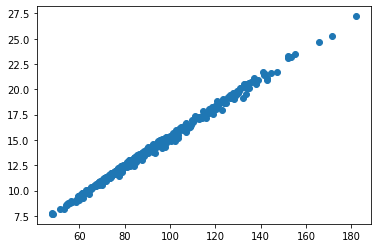

In [1502]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(X_train['Mean_Perimeter'],X_train['Mean_Radius'])


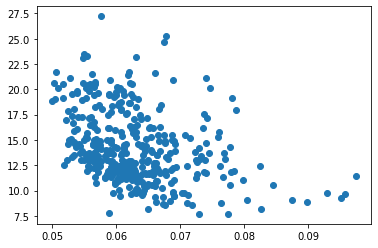

In [1503]:
# example of low negative correlation
plt.scatter(X_train['Mean_Fractal_Dimension'],X_train['Mean_Radius'])


In [1504]:
def predictValues(realValues,predictedValues):
  correct = 0;
  count = 0;
  actualValues = np.array(realValues).reshape(-1,1)
  for i in realValues:
    print('Actual: ', realValues[count], ' Predicted: ', predictedValues[count])
    if predictedValues[count] == realValues[count]:
      correct+=1
    count+=1
  print('Total values: ',count, ' correctly predicted values: ',correct)

In [1505]:
def predictKnnValues(realValues,predictedValues):
  correct = 0;
  count = 0;
  actualValues = np.array(realValues).reshape(-1,1)
  for i in realValues:
    print('Actual: ', realValues[count], ' Predicted: ', predictedValues[count])
    if predictedValues[count] == realValues[count]:
      correct+=1
    count+=1
  print('Total values: ',count, ' correctly predicted values: ',correct)

# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.96 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data. This algorithm works by clustering data with similar features and classifying them.

### references

SKLearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [1506]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=55)
knn.fit(X_train,y_train)
print('Performance of model: ',knn.score(X,y))


Performance of model:  0.9156414762741653


In [1507]:
# Make prediction on testSet
predictValues(y,knn.predict(X))

Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  1
Actual:  1  Predicted:  0
Actual:  0  Predicted:  0
Actual:  1  

# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on features from the dataset, I chose to input a large number of features into this model as generally this algorithm performs better when fitted with more features, in Naive Bayes the weights of the features have no bearing on the output.  The model below appears to be overfitted

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

You may also notice we are using a particular kind of Naive Bayes called Gaussian Naive Bayes for this model.  We chose to include this version of Naive Bayes due to it's ability to handle continuous data. The algorithm also has the advantage of speed and is frequently used in email spam classifiers.  The algorithm works by assuming that the continuous values across the features are normally distributed in a Gaussian fashion(think of a bell curve!)

In [1508]:

from sklearn.naive_bayes import GaussianNB
yTestArray = np.array(y_test).reshape(-1,1)
y_trainArray = np.array(y_train).reshape(-1,1)
probability = np.array(y_test.iloc[0:2]).reshape(-1,1)

# here we smooth the data to improve accuracy
naive_bayes = GaussianNB(priors=None)
y_train_pred = naive_bayes.fit(X_train,y_train).predict(y_trainArray)
print('Score of model on training set: ', naive_bayes.score(X_train,y_train))
y_pred = naive_bayes.fit(X_train,y_train).predict(yTestArray)
print('Score of model on test sets: ', naive_bayes.score(X_test,y_test))
print('Probability of diagnosis values occurring: ',naive_bayes.predict_proba(probability))


Score of model on training set:  0.9623115577889447
Score of model on test sets:  0.9122807017543859
Probability of diagnosis values occurring:  [[0.         1.        ]
 [0.92010396 0.07989604]]


In [1509]:
predictValues(yTestArray,y_pred)
predictValues(y_trainArray,y_train_pred)


Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predic

## Second Naive Bayes Model

Demonstrating the zero frequency phenomenon, we can see below that when we train the model using our NB train sets we experience a phenomenon known as zero frequency.  This occurs when the model takes all probabilities of our features and performs calculations which result in a total score of zero.  Here we induced zero frequency by removing the smoothing of the data

In [1510]:
naive_bayes = GaussianNB(priors=None,var_smoothing=1)


y_train_pred = naive_bayes.fit(X_train,y_train).predict(y_trainArray)
y_pred = naive_bayes.fit(X_train,y_train).predict(yTestArray)
print('Score of model: ', naive_bayes.score(X_test,y_test))



Score of model:  0.8421052631578947


In [1511]:
predictValues(y_trainArray,y_train_pred)
predictValues(yTestArray,y_pred) 

Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predic

# Decision Trees

In [1512]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


Training the first default tree model

In [1513]:
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#clf = clf.fit (X,y)


In [1514]:
print(y_test.shape,y_train.shape,X_train.shape,X_test.shape)

(171,) (398,) (398, 30) (171, 30)


Here we display the tree

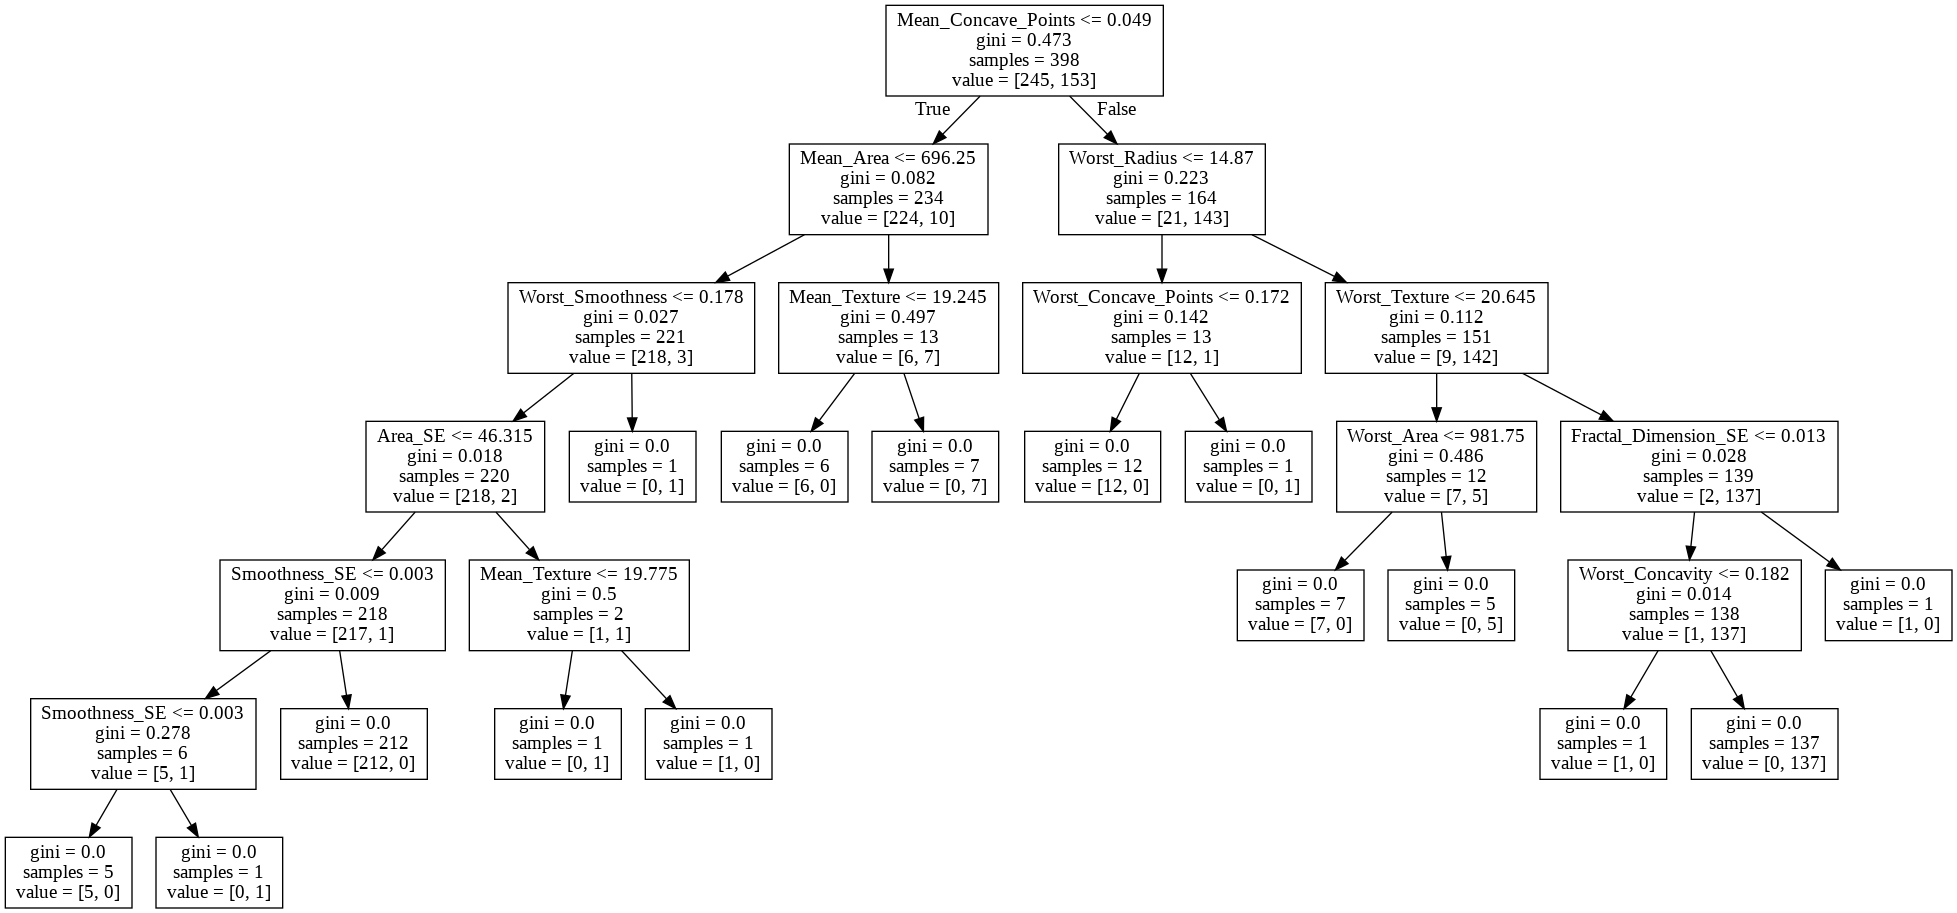

In [1515]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

The predicticton result for head data, this should really be fresh data not reusing training data



In [1516]:
#When we use our training data above we should use our validation data here to test the predictions
print("Making predictions for the following 5 patients:")
print(X_test)
print("The predictions are")
print(clf.predict(X_test))

Making predictions for the following 5 patients:
     Mean_Radius  Mean_Texture  ...  Worst_Symmetry  Worst_Fractal_Dimension
517       19.890         20.26  ...          0.2549                  0.09136
314        8.597         18.60  ...          0.3142                  0.08116
116        8.950         15.76  ...          0.1652                  0.07722
474       10.880         15.62  ...          0.2581                  0.10800
288       11.260         19.96  ...          0.2955                  0.07009
..           ...           ...  ...             ...                      ...
377       13.460         28.21  ...          0.2694                  0.07061
60        10.170         14.88  ...          0.3557                  0.08020
300       19.530         18.90  ...          0.2968                  0.09929
543       13.210         28.06  ...          0.2473                  0.06443
479       16.250         19.51  ...          0.3318                  0.09136

[171 rows x 30 columns]
Th

Desicion tree test results



In [1517]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1]
Accuracy: 0.9239766081871345


Random forest

In [1518]:

from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier(n_estimators=10)
rfclf = rfclf.fit(X,y)
#Predict result from the data given
y_pred=rfclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1]
Accuracy: 1.0


So we can see that the Random forrest is more accurate

We also explored the alternative to the decision tree using entropy criterion rather than the default gini



In [1519]:

entclf = tree.DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
entclf = entclf.fit(X_train,y_train)

Display the entropy tree



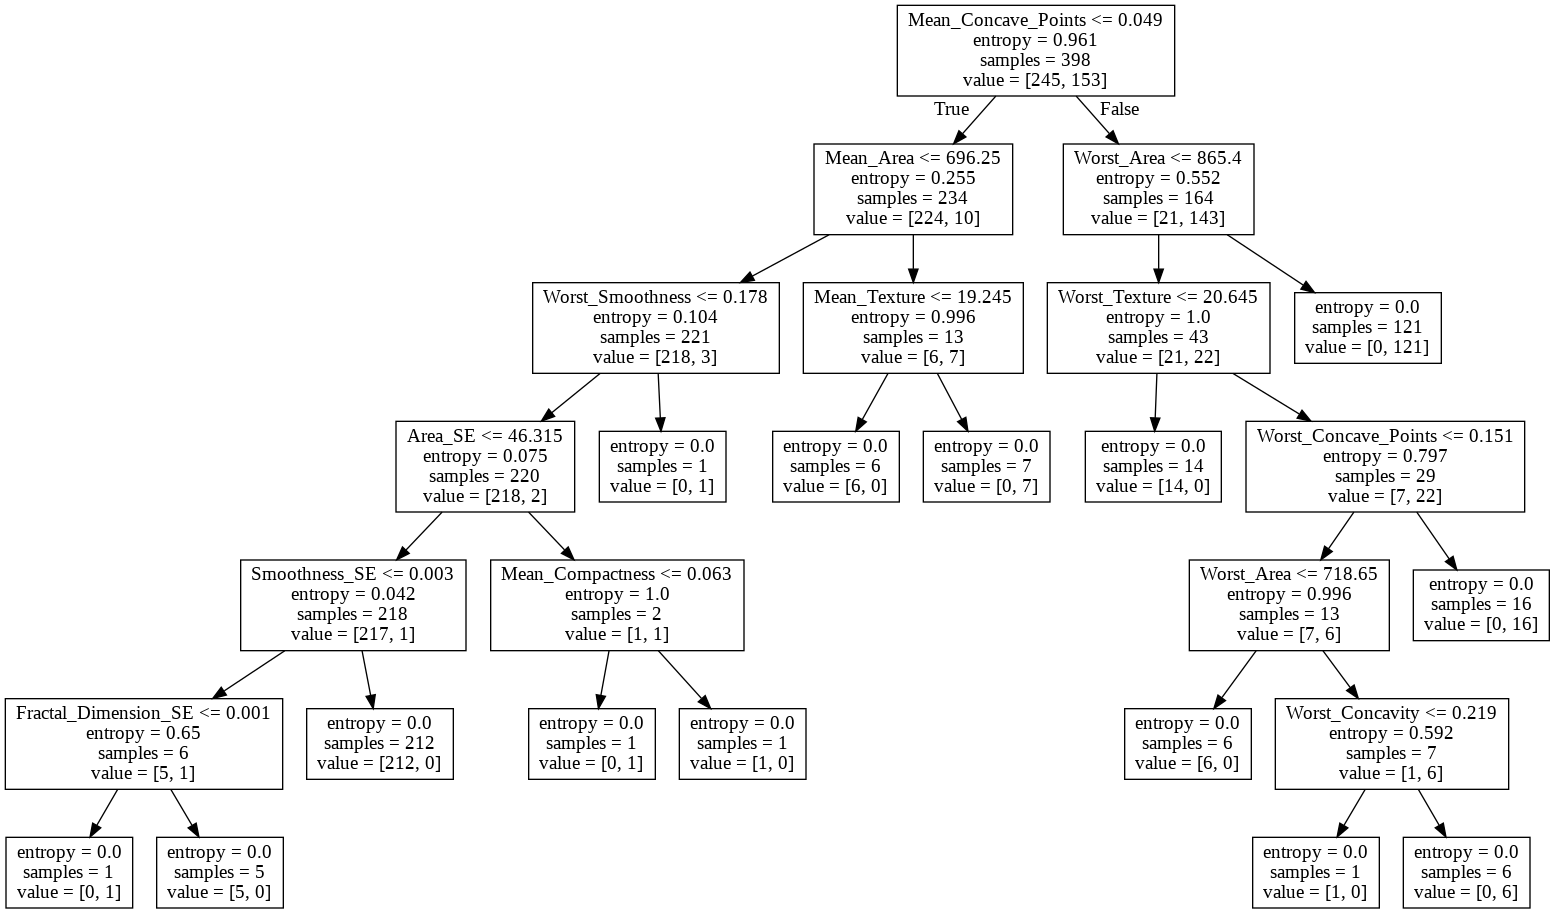

In [1520]:
from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(entclf, out_file=dot_data, feature_names=features)
graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

entropy tree results

In [1521]:

#Predict the response for test dataset
y_pred = entclf.predict(X_test)
print(y_pred)
# Test decision tree accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1]
Accuracy: 0.9298245614035088


Random Entropy forrest

In [1522]:

rfentclf = RandomForestClassifier(criterion="entropy",n_estimators=10)
rfentclf = rfentclf.fit(X_train,y_train)
#Predict result from the data given
y_pred=rfentclf.predict(X_test)
print(y_pred)

#Test Random forrrest accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1]
Accuracy: 0.9298245614035088


testing via crossvalidation



In [1523]:
from sklearn.model_selection import cross_val_score
np.random.seed(1)
scores = cross_val_score(clf, X, y)
print('gini tree accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(rfclf, X, y)
print('gini random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(entclf, X, y)
print('entropy accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))
scores = cross_val_score(rfentclf, X, y)
print('entropy random forest accuracy = {} +/- {}'\
        .format(scores.mean(axis=0), scores.std(axis=0)))


gini tree accuracy = 0.9121099208197485 +/- 0.011235106844788624
gini random forest accuracy = 0.9525694767893185 +/- 0.016223037334090338
entropy accuracy = 0.9331936034777207 +/- 0.01540870493426004
entropy random forest accuracy = 0.9525384257102936 +/- 0.018922161707975938


Creating the Model For DecisionTreeRegression() (Problematic due to M/B classification rather than a series of numeric variables, may not be a viable model for this data)